## Multiple regression

First I generated the random variables A and B (with correlation 0.2).
Then I made the variable Y, which is dependent on A and A*B.

In [282]:
# generate correlated random variables A and B

library(MASS)

set.seed(6)
rawvars <- mvrnorm(n=100, mu=c(0,0), Sigma=matrix(c(0.3,0.05,0.05,0.3),nrow=2))
A <- rawvars[,1]
B <- rawvars[,2]

# making a model with a main effect of a and an interaction effect of b
Y = 0.5*A - 2*A*B + rnorm(100,0,0.2)


Below you can see that all variables have a significant correlation

In [283]:
cat("correlation between A and B (rho): ",cor.test(A,B)$statistic)
cat("\ncorrelation between A and Y (rho): ",cor.test(A,Y)$statistic)
cat("\ncorrelation between B and Y (rho): ",cor.test(B,Y)$statistic)

correlation between A and B (rho):  2.958563
correlation between A and Y (rho):  2.622866
correlation between B and Y (rho):  -2.968116

In [284]:
cat("correlation between A and B (pvalue): ",cor.test(A,B)$p.value)
cat("\ncorrelation between A and Y (pvalue): ",cor.test(A,Y)$p.value)
cat("\ncorrelation between B and Y (pvalue): ",cor.test(B,Y)$p.value)

correlation between A and B (pvalue):  0.003874637
correlation between A and Y (pvalue):  0.010112
correlation between B and Y (pvalue):  0.003765949

Even if you look on a figure you can see that B and Y are related.

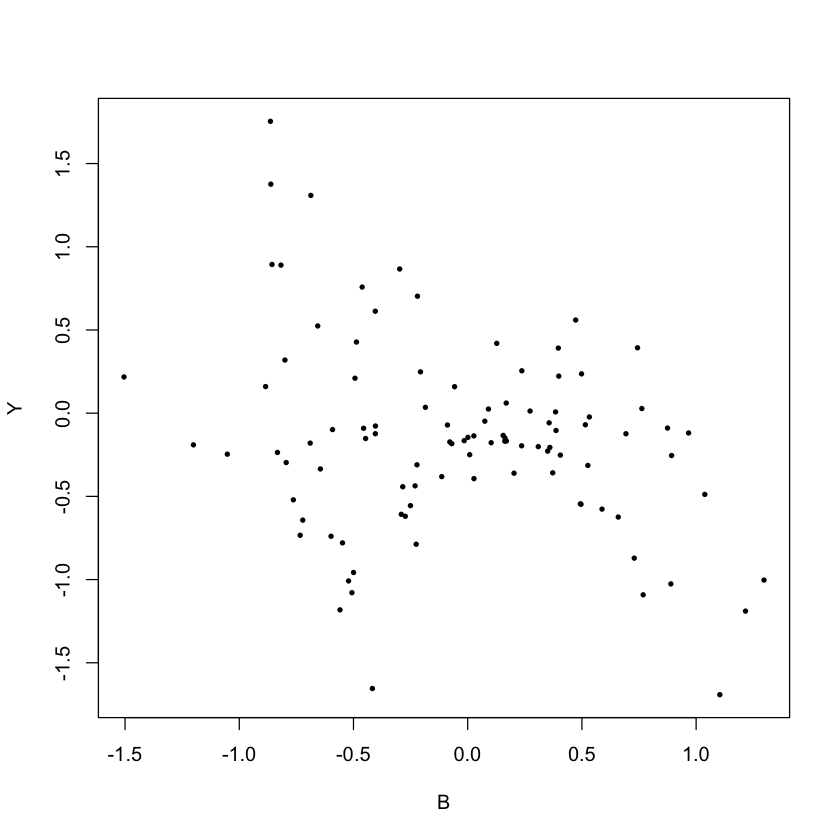

In [285]:
plot(B,Y,pch=16,cex=0.6)

But in the multiple regression, the main effect becomes (correctly) non-significant.

In [286]:
MulReg = lm(Y~A+B+A*B)
summary(MulReg)


Call:
lm(formula = Y ~ A + B + A * B)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61731 -0.12984  0.00883  0.09874  0.40116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03047    0.02084  -1.462    0.147    
A            0.47493    0.04230  11.228   <2e-16 ***
B           -0.05396    0.03772  -1.430    0.156    
A:B         -1.84290    0.07659 -24.061   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1967 on 96 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8837 
F-statistic: 251.8 on 3 and 96 DF,  p-value: < 2.2e-16
